# Comparison of all Pedersen N02 cases

## Nalu-Wind/AMR-Wind vs Pedersen (2014) results

Comparison between our runs and Pedersen's 2014 paper

**Note**: To convert this notebook to PDF, use the command
```bash
$ jupyter nbconvert --TagRemovePreprocessor.remove_input_tags='{"hide_input"}' --to pdf postpro_n07.ipynb
```

In [1]:
%%capture
# Important header information
naluhelperdir = '../utilities/'
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)
import plotABLstats

from matplotlib.lines import Line2D
%matplotlib inline

#### Define a function to load the Nalu-Wind data

In [2]:
def loadNaluWind(rundir, vtxtfile, ttxtfile, ncfile='', avgtimes=[], usencfile=True, savefile=True):
    """
    Function to automatically load the velocity and temperature profile
    
    rundir       string with location where run files are located
    vtxtfile     text file with previously saved velocity profiles
    ttxtfile     text file with previously saved temperature profiles
    ncfile       netcdf file with ABL statistics (usually 'abl_statistics.nc')
    avgtimes     list with times [t1, t2] to average over (applicable when using netcdf file)
    usencfile    boolean: if True, read the netcdf file, if False, use the previously saved text files
    savefile     boolean: if True, save the data from the netcdf file to text files
    """
    if usencfile:
        # Load the data from the netcdf file
        data              = plotABLstats.ABLStatsFileClass(stats_file=rundir+'/'+ncfile);
        Vprof, vheader    = plotABLstats.plotvelocityprofile(data, None, tlims=avgtimes, exportdata=True)
        Tprof, theader    = plotABLstats.plottemperatureprofile(data, None, tlims=avgtimes, exportdata=True)
        if savefile:
            # Export the Nalu-Wind data for other people to compare
            np.savetxt(vtxtfile, Vprof, header=vheader)
            np.savetxt(ttxtfile, Tprof, header=theader) 
    else:
        # Load the data from pre-computed text files
        Vprof             = np.loadtxt(rundir+'/'+vtxtfile)  # Velocity profile
        Tprof             = np.loadtxt(rundir+'/'+ttxtfile)  # Temperature profile
    return Vprof, Tprof

#### Load the Nalu-Wind Smagorinsky case (OLD BC)

In [3]:
NaluSmag_VOLD, NaluSmag_TOLD = loadNaluWind('NaluWindRun01', 'NaluWind_N02_velocity.dat', 'NaluWind_N02_temperature.dat', usencfile=False)

#### Load the Nalu-Wind Smagorinsky case (New BC)

In [4]:
NaluSmag_V, NaluSmag_T = loadNaluWind('NaluWindRun02', 'NaluWind_N02_velocity.dat', 'NaluWind_N02_temperature.dat', usencfile=False)

#### Load the Nalu-Wind K-SGS case

In [5]:
NaluKSGS_V, NaluKSGS_T = loadNaluWind('NaluWindRun03', 'NaluWind_N02_velocity.dat', 'NaluWind_N02_temperature.dat', usencfile=False)

#### Load the Pedersen (2014) Results

In [6]:
# Pedersen parameters
datadir   = 'pedersen2014_data' 
ped_umag  = np.loadtxt(datadir+'/umag_pederesen2014.txt', delimiter=',')
ped_T     = np.loadtxt(datadir+'/temperature_pedersen2014.txt', delimiter=',')
h         = 543   # In meters

### Make the velocity comparison plot

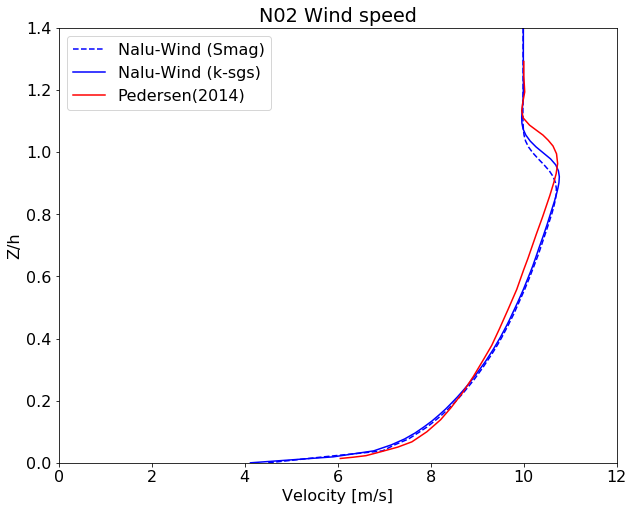

In [7]:
# Plot the velocity profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=16)

plt.plot(NaluSmag_V[:,4], NaluSmag_V[:,0]/h,     'b--', label='Nalu-Wind (Smag)')
plt.plot(NaluKSGS_V[:,4], NaluKSGS_V[:,0]/h,     'b', label='Nalu-Wind (k-sgs)')
plt.plot(ped_umag[:,0], ped_umag[:,1],           'r', label='Pedersen(2014)')

# Construct a legend
plt.legend()
plt.ylim([0, 1.4]);
plt.xlim([0, 12])
plt.xlabel('Velocity [m/s]')
plt.ylabel('Z/h')
#plt.grid()
plt.title('N02 Wind speed')

### Make the temperature comparison plot

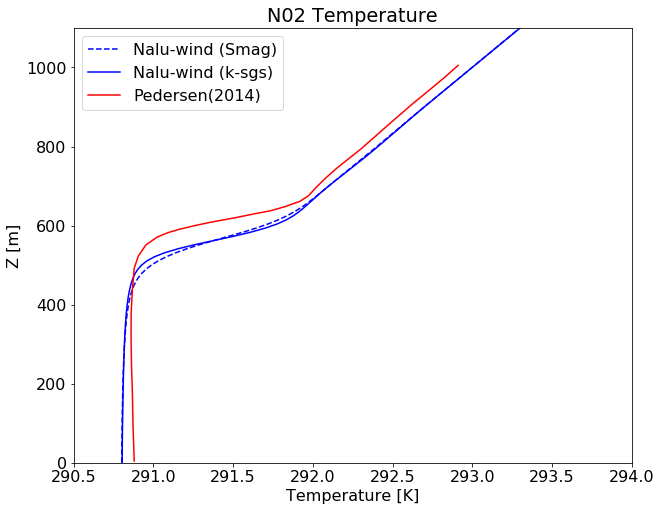

In [8]:
# Plot the temperature profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=16)

plt.plot(NaluSmag_T[:,1], NaluSmag_T[:,0], 'b--', label='Nalu-wind (Smag)')
plt.plot(NaluKSGS_T[:,1], NaluKSGS_T[:,0], 'b',   label='Nalu-wind (k-sgs)')
plt.plot(ped_T[:,0], ped_T[:,1], 'r', label='Pedersen(2014)')

# Construct a legend
plt.legend()
plt.ylim([0, 1100]);
plt.xlim([290.5, 294])
plt.xlabel('Temperature [K]')
plt.ylabel('Z [m]')
#plt.grid()
plt.title('N02 Temperature')